# Homework Answer Week 6

by Rahma Hayuning Astuti

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
filename = '../data/jamb_exam_results.csv'

In [ ]:
#get the data
import urllib.request
url = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'
urllib.request.urlretrieve(url, filename)

('../data/jamb_exam_results.csv', <http.client.HTTPMessage at 0x255fddf1510>)

## Preparing the dataset

In [4]:
df = pd.read_csv(filename)
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
#replace the column name
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [6]:
df = df.drop(['student_id'], axis = 1)
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [7]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [8]:
df.isna().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [9]:
df['parent_education_level'] = df['parent_education_level'].fillna(0)
df.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

### Split the dataset

In [10]:
#split the dataset
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<Axes: >

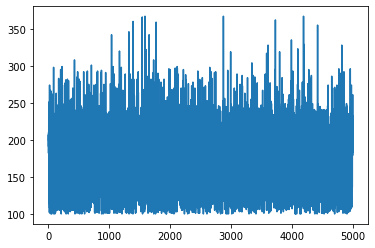

In [12]:
# target data plotting

df.jamb_score.plot()

In [13]:
#y variable
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

#del above_average in dataset for train
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [14]:
from sklearn.feature_extraction import DictVectorizer

In [15]:
#train 
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

#validation
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

which feature is used for splitting the data?


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

In [17]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

#to look at the inside of the tree
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



Answer: study_hours_per_week

## Question 2

Train random forest with n_estimators=10
random_state=1
n_jobs=-1

whats the RMSE?

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# Calculate the rmse
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

42.13724207871227

Answer: 42.13

## Question 3

- try different n_estimator from 10 to 200 with step 10
- random_state = 1

After which values of n_estimators does RMSE stop improving?

    n_estimators    rmse
0             10  42.137
1             20  41.461
2             30  41.106
3             40  40.917
4             50  40.852
5             60  40.784
6             70  40.677
7             80  40.539
8             90  40.504
9            100  40.517
10           110  40.593
11           120  40.625
12           130  40.651
13           140  40.595
14           150  40.597
15           160  40.604
16           170  40.628
17           180  40.641
18           190  40.631
19           200  40.601


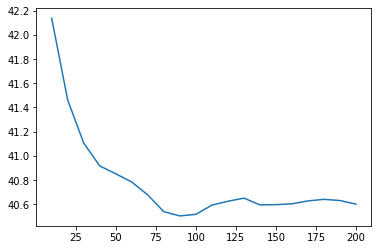

In [20]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1) 
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(3)
    scores.append((n, rmse))


# made it as dataframe
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
print(df_scores)

#plot the data
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

Actually I can't decide which one is it like it still moves up and down

## Question 4

- select best max_depth: [10, 15, 20, 25]
- different values of n_estimaators from 10 till 200 (with step 10)
- calculate the mean RMSE
- random_state=1

What's the best max_depth, using mean RMSE?

    max_depth  n_estimators       rmse
0          10            10  41.258349
1          10            20  40.880528
2          10            30  40.624956
3          10            40  40.270069
4          10            50  40.317006
..        ...           ...        ...
75         25           160  40.600208
76         25           170  40.624371
77         25           180  40.638564
78         25           190  40.628661
79         25           200  40.598527

[80 rows x 3 columns]


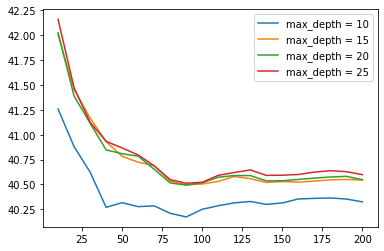

In [21]:
scores = []
for d in[10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1) 
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))


#make the dataframe
columns=['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
print(df_scores)

#plot
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label ='max_depth = %d' %d)
    
plt.legend()

best max_depth = 10

## Question 5 (find the most important feature)

Train the model with these parameters:
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1

In [22]:
rf = RandomForestRegressor(n_estimators=10, 
                           max_depth=20,
                           random_state=1, 
                           n_jobs=-1)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [23]:
features = dv.get_feature_names_out()
feature_importance = rf.feature_importances_
zip_feature_importance = list(zip(features, feature_importance))
zip_feature_importance

[('access_to_learning_materials=No', 0.012325395818561702),
 ('access_to_learning_materials=Yes', 0.010261891957053595),
 ('age', 0.06931145469695396),
 ('assignments_completed', 0.031516789454600694),
 ('attendance_rate', 0.14972902978467467),
 ('distance_to_school', 0.13648580486323686),
 ('extra_tutorials=No', 0.013459336291731933),
 ('extra_tutorials=Yes', 0.009131355726749436),
 ('gender=Female', 0.009288710588929933),
 ('gender=Male', 0.010382634572648444),
 ('it_knowledge=High', 0.017719342039411903),
 ('it_knowledge=Low', 0.012404050525957135),
 ('it_knowledge=Medium', 0.009141479881545293),
 ('parent_education_level', 0.0),
 ('parent_education_level=Primary', 0.015450360187928138),
 ('parent_education_level=Secondary', 0.016956919815100065),
 ('parent_education_level=Tertiary', 0.014488617277194148),
 ('parent_involvement=High', 0.02291885292906419),
 ('parent_involvement=Low', 0.013357613537934165),
 ('parent_involvement=Medium', 0.011492011642547156),
 ('school_location=Rura

In [24]:
#make it as dataframe
df_feature_importance = pd.DataFrame(zip_feature_importance, columns=['features', 'feature_importance'])

#sorting
df_feature_importance.sort_values(by='feature_importance', ascending=False).head()

,features,feature_importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311


The most important feature: study_hours_per_week

## Question 6

XGBoost Model!

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
also change eta to 0.1
which eta leads the best RMSE score on the validation dataset?

In [1]:
import xgboost as xgb

In [25]:
features =list(dv.get_feature_names_out())

# Create DMatrix for train and validation

dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names=features)

In [26]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [27]:
%%capture output 

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [28]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [29]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [30]:
%%capture output 

#change eta to 0.1
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [31]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

dict_keys(['eta=0.3', 'eta=0.1'])


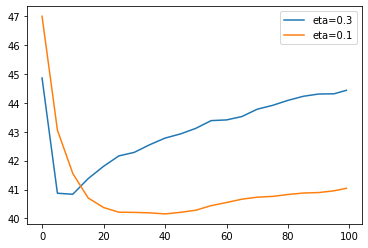

In [32]:
print(scores.keys())
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc.round(3), label = key)
plt.legend()

eta = 0.1 the best